In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def no_drag(v0, grados, y0, t, g = 9.81):
    #Convertir ángulo a radianes
    rad = np.radians(grados)
    
    #Velocidad inicial
    v0x = v0 * np.cos(rad)
    v0y = v0 * np.sin(rad)

    #r(t)
    rx = v0x * t
    ry = y0 + v0y * t - 4.9 * t ** 2

    return rx , ry

In [3]:
def maximos(grados, v0):
    rad = np.radians(grados)
    v0y = v0*np.sin(rad)
    v0x = v0*np.cos(rad)
    c = [-4.9, v0y, y0]
    root = np.roots(c)
    for i in range(1):
        maxx= v0x*root[i]
    tmy = v0y/9.8
    maxy = -4.9*tmy**2 + v0y*tmy + y0
    return maxx, maxy

In [4]:
def coefficient(rho, c, a):
    d = (rho * c * a)/2
    return d

In [5]:
def mass(r, densidad): 
    vol = (4/3) * np.pi * r ** 3
    m = vol * densidad
    return m

In [6]:
def drag(v0, grados, y0, m, d, dt, itera):
    g = 9.81
    #Grados a radianes
    rad = np.radians(grados)

    # velocidad inicial
    v0x = v0 * np.cos(rad)
    v0y = v0 * np.sin(rad)

    #tiempo
    t = 0
    t_list = [t]

    #velocidad
    v = v0
    vx = v0x
    vy = v0y

    v_list = [v]
    v_x_list = [v0x]
    v_y_list = [v0y]

    # Posición
    x = 0
    y = y0

    x_list = [x]
    y_list = [y]

    # Aceleración inicial
    ax = -(d/m)*v*vx
    ay = -g-(d/m)*v*vy

    a_x_list = [ax]
    a_y_list = [ay]
    
    for _ in range(itera):
            
        # Velocidades para 'x' y 'y' del siguiente paso
        v_x_next = vx + (ax) * dt
        v_y_next = vy + (ay) * dt
        
        # Magnitud del vector de velocidad con componentes v_x_next y v_y_next
        v_next = np.sqrt((v_x_next) ** 2 + (v_y_next) ** 2)

        # Agregar valores a listas v_list, v_x_list, v_y_list. 
        v_list.append(v_next)
        v_x_list.append(v_x_next)
        v_y_list.append(v_y_next)

        # Posiciones 'x' y 'y' del siguiente paso
        x_next = x + v_x_next * dt + (1/2) * ax * (dt ** 2)
        y_next = y + v_y_next * dt + (1/2) * ay * (dt ** 2)
        
        # Agregar calores a listas x_list y y_list
        x_list.append(x_next)
        y_list.append(y_next)
        
        # Aceleraciones para 'x' y 'y' del siguiente paso
        a_x_next = -(d/m) * v * v_x_next
        a_y_next = -g -(d/m) * v * v_y_next

        # Agregar valores a listas a_x_list y a_y_list
        a_x_list.append(a_x_next)
        a_y_list.append(a_y_next)
        
        vx = v_x_next
        vy = v_y_next
        v = v_next

        x = x_next
        y = y_next

        ax = a_x_next
        ay = a_y_next

        # Calcular tiempo y guardarlo en una lista t_list
        t += dt
        t_list.append(t)
        
    return x_list, y_list, v_list, v_x_list, v_y_list, a_x_list, a_y_list, t_list


In [7]:
def trayectorias1(rx, ry, x_list, y_list, xm, ym, title="Trayectoria de proyectiles"):
    fig = plt.Figure(figsize = (15, 9))
    plt.plot(rx, ry, label = "Vacío")
    plt.plot(x_list, y_list, label = "Con resistencia al aire")
    plt.grid()
    plt.axis("scaled")
    plt.title("Trayectorias con y sin resistencia al aire")
    plt.xlim([0, xm + 1000])
    plt.ylim([0, ym + 1000])
    return fig


5911.143477502055


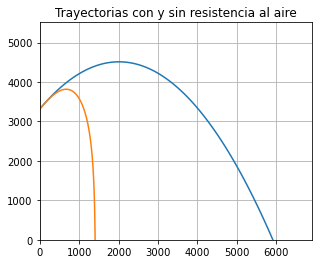

In [8]:
v0 = 200
grados = 50
y0 = 3315
t = np.linspace(0, 60, num = 100)
r = 0.1
a = np.pi*r**2
rho = 0.9
densidad = 2100
c = 0.6
dt = 0.1
itera = 1000
rx, ry = no_drag(v0, grados, y0, t, g=9.81)
m = mass(r, densidad)
d = coefficient(rho, c, a)
[x_list, y_list, v_list, v_x_list, 
 v_y_list, a_x_list, a_y_list, t_list] = drag(v0, grados, y0, m, d, dt, itera)
maxx, maxy = maximos(grados, v0)
print(maxx)
fig = trayectorias1(rx, ry, x_list, y_list, maxx, maxy, title="Trayectoria de proyectiles")

In [9]:
def pc(rx, ry):
    max_list = []
    m0 = (ry[1]-ry[0])/(rx[1]-rx[0])
    for i in range(2, len(ry)):
        m = (ry[i]-ry[i-1])/(rx[i]-rx[i-1])
        if m0 > 0 and m < 0:
            max_list.append(i)
        elif m0 < 0 and m > 0:
            max_list.append(i)
        m0 = m
    return max_list

In [10]:
max_list = pc(rx, ry)
print(max_list)

[27]


In [11]:
print(ry[26])

4512.524819820324


In [12]:
ydmax = max(y_list)
print(ydmax)

3817.4157638730403


In [13]:
print(x_list)

[0, 12.483853648126434, 24.726947261610427, 36.74216460958556, 48.53892405063646, 60.126033891603946, 71.51179097265529, 82.70402074446422, 93.7101126096295, 104.53705196868782, 115.19144934969167, 125.67956693587122, 136.00734276656073, 146.18041285302976, 156.20413142193377, 166.08358947407655, 175.8236318244779, 185.4288727708683, 194.90371052128464, 204.25234049706663, 213.47876761496596, 222.5868176410294, 231.5801476991968, 240.46225600898663, 249.2364909190717, 257.9060592968504, 266.4740343281778, 274.94336277614593, 283.3168717431056, 291.59727497593815, 299.7871787508466, 307.88908737059336, 315.90540830411857, 323.8384569957851, 331.69046136908497, 339.4635660474683, 347.15983631300253, 354.7812618218013, 362.3297600935721, 369.8071797911858, 377.2153038048695, 384.555852154437, 391.8304847218996, 399.0408038258222, 406.1883566479032, 413.2746375214482, 420.30109009067127, 427.2691093490868, 434.1800435646419, 441.03519609867953, 447.835827125313, 454.58315525732206, 461.278

In [14]:
print(x_list[27])

274.94336277614593


In [15]:
print(y_list)

[3315, 3329.7305274345754, 3344.0788661257693, 3358.0620780512304, 3371.692983423509, 3384.9835748133005, 3397.9451419811708, 3410.58832660496, 3422.923170722991, 3434.959160668167, 3446.7052670081302, 3458.169980922204, 3469.3613473920523, 3480.286995537065, 3490.954166385883, 3501.3697383412027, 3511.540250565302, 3521.471924487882, 3531.1706836153003, 3540.6421718005895, 3549.8917701164214, 3558.924612458043, 3567.745599989906, 3576.3594145379725, 3584.7705310193246, 3592.983228991531, 3601.001603396091, 3608.82957456305, 3616.4708975374683, 3623.929170782672, 3631.2078443101173, 3638.3102272811216, 3645.2394951216056, 3651.9986961873324, 3658.5907580138123, 3665.0184931820804, 3671.2846048288693, 3677.3916918272957, 3683.3422536619883, 3689.1386950206147, 3694.783330121983, 3700.278386799269, 3705.6260103554523, 3710.8282672067044, 3715.8871483282624, 3720.804572516211, 3725.5823894775863, 3730.2223827602897, 3734.726272533469, 3739.095718228236, 3743.332321047904, 3747.43762635626

In [27]:
for k in range(itera): 
    p_fin = 0
    if y_list[k] < 0:
        p_fin = k-1
        break

In [28]:
print(p_fin)

541


In [29]:
y_list[p_fin]

9.248578458899665

In [30]:
v_x_list[p_fin]

1.0829304304050984

In [31]:
v_y_list[p_fin]

-100.8127649469293

In [32]:
v_list[p_fin]

100.81858119692974

In [34]:
def velocidad_final(v_list, itera):
    for k in range(itera): 
        p_fin = 0
        if y_list[k] < 0:
            p_fin = k-1
            break
    vel_fin = v_list[p_fin]
    return vel_fin

In [35]:
vel_fin = velocidad_final(v_list, itera)

In [36]:
print(vel_fin)

100.81858119692974


In [60]:
v0x = 155.88
v0y = 90
y0 = 3000

def velocidad_final(v0y, v0x):
    c = [-4.9, v0y, y0]
    root = np.roots(c)
    y_fin = root[0]
    v_fin = np.sqrt(v0x**2 + (v0y-9.8*y_fin)**2)
    return v_fin

In [61]:
v_fin = velocidad_final(v0y, v0x)
print(v_fin)

301.9910170849458


In [54]:
print(root[0])

35.57656562526033
